## Perceptron
Implementing a perceptron from scratch. This code was written for my Fundamentals of AI class at the University of Palermo in May 2023.

Inspired by: *Gutiérrez-García, J.O. [Código Máquina]. (2022, 17 de Enero). Perceptrón Paso a Paso con Python: La Base de las Redes Neuronales Artificiales de Machine Learning.*

For this purpose, we will develop a perceptron that assesses the eligibility of individuals for a loan based on their age and savings as input variables.

## Imports

In [99]:
import matplotlib.pyplot as plt
import numpy as np

## Training Data

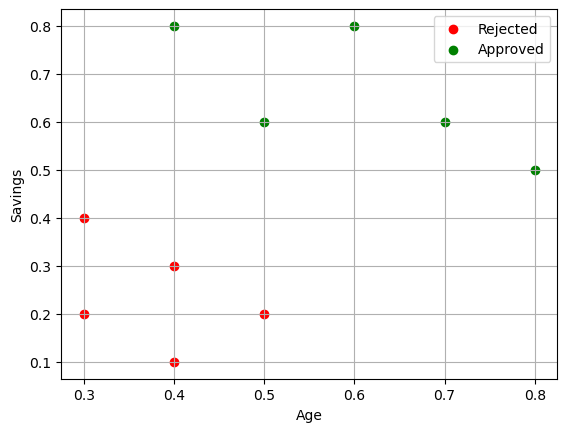

In [100]:
# [age, savings] -> please note that these are normalized values. E.g. Age: 0.3 = 30 y.o and Savings: 0.2 = $20.000
individuals = np.array([[0.3, 0.4], [0.4, 0.3],
              [0.3, 0.2], [0.4, 0.1], 
              [0.5, 0.2], [0.4, 0.8],
              [0.6, 0.8], [0.5, 0.6], 
              [0.7, 0.6], [0.8, 0.5]])
# 1 = approved       0 = rejected
labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Scatter Plot to better see the situation
plt.scatter(individuals[labels==0].T[0],individuals[labels==0].T[1], c='red', label="Rejected")
plt.scatter(individuals[labels==1].T[0],individuals[labels==1].T[1], c='green',label="Approved")
plt.xlabel("Age")
plt.ylabel("Savings")
plt.legend()
plt.grid()
plt.show()

## Activation function
Applies a step rule where a value of 1 represents approval and a value of 0 represents rejection.

![Perceptron Model](https://images.deepai.org/glossary-terms/perceptron-6168423.jpg)
This image illustrates a perceptron model, where age and savings are utilized as input variables in our example.
*Source: DeepAI*

In [101]:
# w: weights, x: inputs, b: bias
def step_activiation(w, x, b):
    z = w * x
    return 1 if z.sum() + b > 0 else 0

# random vector of weights (two values)
w = np.random.uniform(-1,1, size=2)
# random bias
b = np.random.uniform(-1,1)

## Running the perceptron
The perceptron utilizes an activation function to make predictions and learns from errors to update weights and bias values.

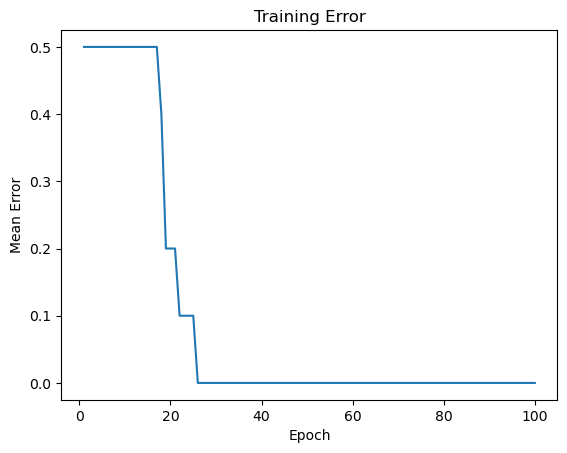

In [102]:
learning_rate = 0.01
max_epochs = 100
# Store training errors for each epoch
errors = []

for e in range(max_epochs):
    total_error = 0
    # loop trough each individual
    for i in range(len(individuals)):
        prediction = step_activiation(w, individuals[i], b)
        # error = 0 if the perceptron is right, else is 1
        error = labels[i] - prediction
        total_error += abs(error)
        # Calculate mean error for the epoch
        mean_error = total_error / len(individuals)
        # update weights and bias. Only if error = 1 modify the value.
        w[0] += learning_rate * individuals[i][0] * error
        w[1] += learning_rate * individuals[i][1] * error
        b += learning_rate * error
    errors.append(mean_error)
    
# Plot the training error line
plt.plot(range(1, max_epochs + 1), errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Error')
plt.title('Training Error')
plt.show()

In [103]:
# Test example. 10 y.o with no savings
step_activiation(w, [0.1, 0], b)

0

0 stands for rejection, which is the correct scenario for this case.

In [104]:
# Test example. 60 y.o with 75k savings
step_activiation(w, [0.6, 0.75], b)

1

1 stands for acceptance, which is the correct scenario for this case.

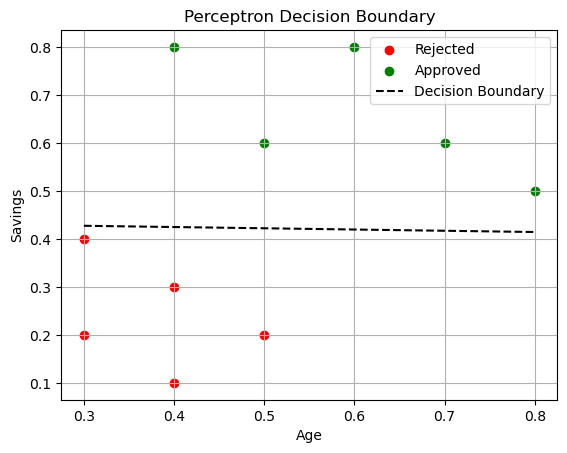

In [105]:
# Plot the scatter plot
plt.scatter(individuals[labels==0].T[0],individuals[labels==0].T[1], c='red', label="Rejected")
plt.scatter(individuals[labels==1].T[0],individuals[labels==1].T[1], c='green',label="Approved")

# Define the x-axis range for the line
x_line = np.linspace(np.min(individuals[:, 0]), np.max(individuals[:, 0]), 100)

# Calculate the corresponding y-axis values for the line. 0 = w[0]*x + w[1]*y + b
y_line = (-w[0] * x_line - b) / w[1]

# Plot the line
plt.plot(x_line, y_line, color='black', linestyle='--', label='Decision Boundary')

# Set labels and show the plot
plt.xlabel('Age')
plt.ylabel('Savings')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid()
plt.show()

## Scikit-learn perceptron
Implementing a perceptron using Scikit-learn.

In [106]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron().fit(individuals, labels)
perceptron.predict([[0.2,0.2], [0.8,0.8]])

array([0, 1])

Again the answers are correct, the first individual is rejected and the second one accepted.